In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
data = pd.read_csv(
    'Lab2/superstore.csv',parse_dates=['Order Date']
    
)

In [5]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


<AxesSubplot:ylabel='Density'>

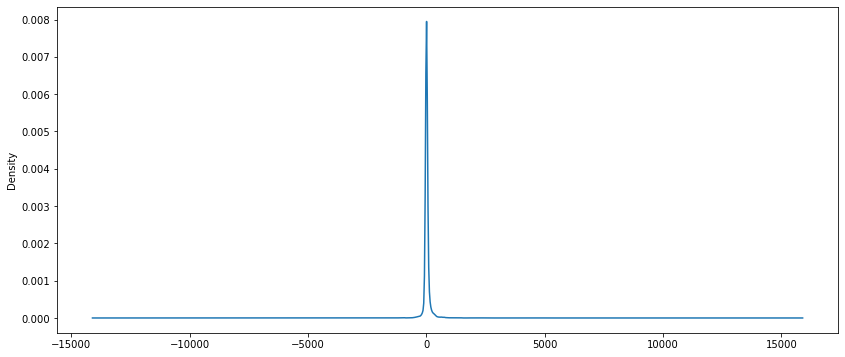

In [8]:
data['Profit'].plot(kind='kde', figsize=(14,6))

<AxesSubplot:>

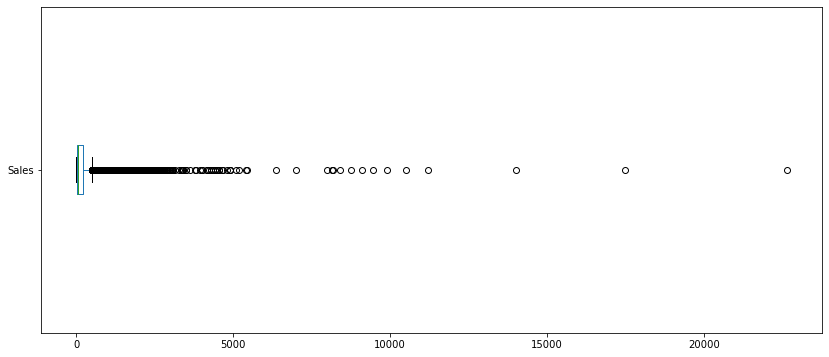

In [9]:
data['Sales'].plot(kind='box', vert=False, figsize=(14,6))

In [11]:
data['Customer Name'].value_counts()

William Brown          37
Matt Abelman           34
Paul Prost             34
John Lee               34
Chloris Kastensmidt    32
                       ..
Anthony O'Donnell       1
Ricardo Emerson         1
Lela Donovan            1
Carl Jackson            1
Jocasta Rupert          1
Name: Customer Name, Length: 793, dtype: int64

<AxesSubplot:ylabel='Region'>

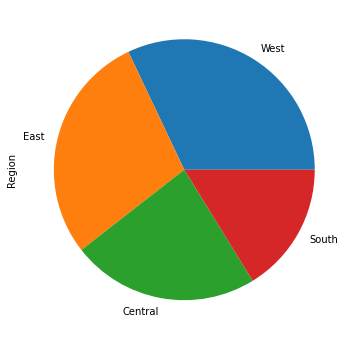

In [14]:
data['Region'].value_counts().plot(kind='pie',figsize=(6,6))

In [27]:
corr=data.corr()
corr

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
Row ID,1.000000,0.009671,-0.001359,-0.004016,0.013480,0.012497
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.001359,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,-0.004016,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.013480,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,0.012497,-0.029961,0.479064,0.066253,-0.219487,1.000000


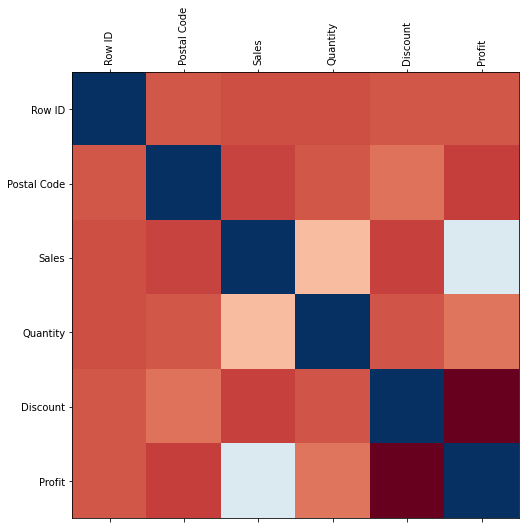

In [28]:
fig=plt.figure(figsize=(8,8))
plt.matshow(corr,cmap='RdBu',fignum=fig.number)
plt.xticks(range(len(corr.columns)),corr.columns,rotation='vertical');
plt.yticks(range(len(corr.columns)),corr.columns);

<AxesSubplot:ylabel='Frequency'>

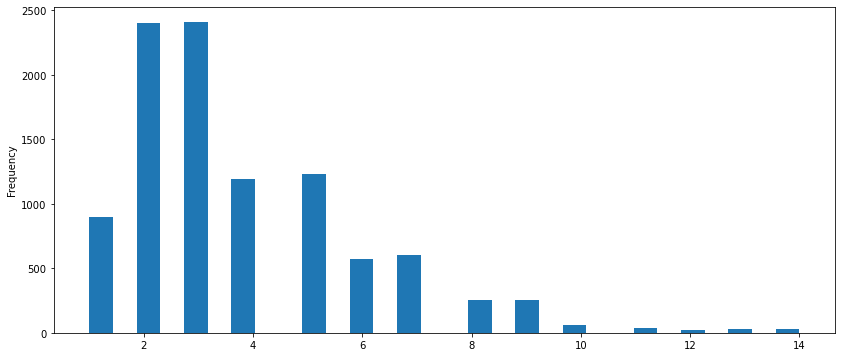

In [29]:
data['Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

Text(0.5, 0, 'Category')

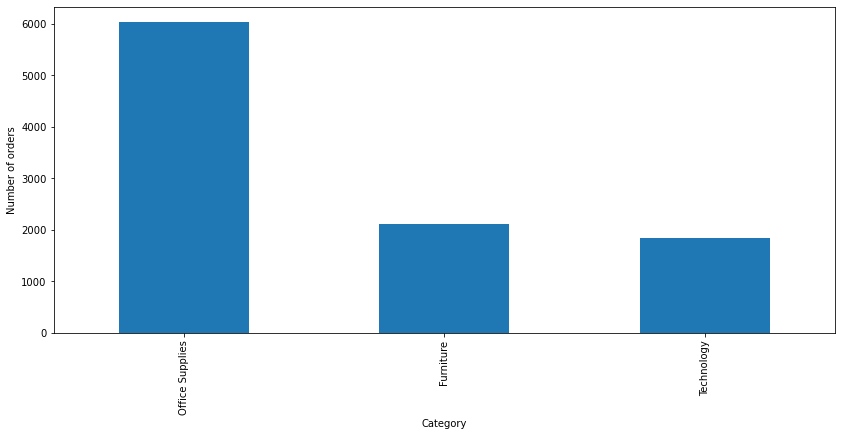

In [33]:
ax=data['Category'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of orders')
ax.set_xlabel('Category')

Text(0.5, 0, 'Sub-Category')

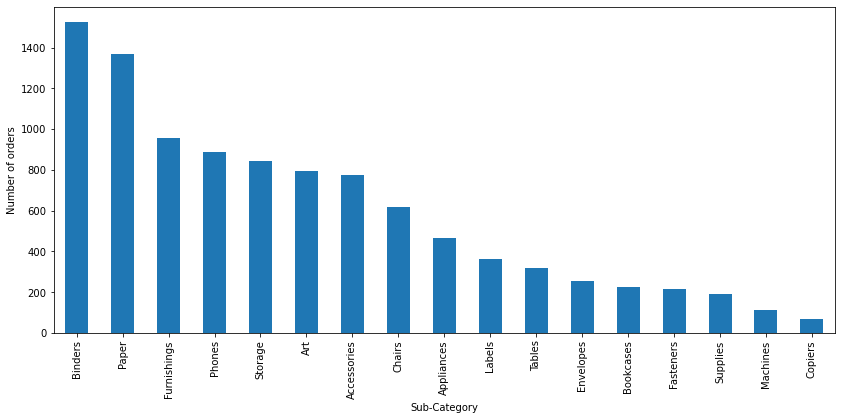

In [34]:
ax=data['Sub-Category'].value_counts().plot(kind='bar',figsize=(14,6))
ax.set_ylabel('Number of orders')
ax.set_xlabel('Sub-Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

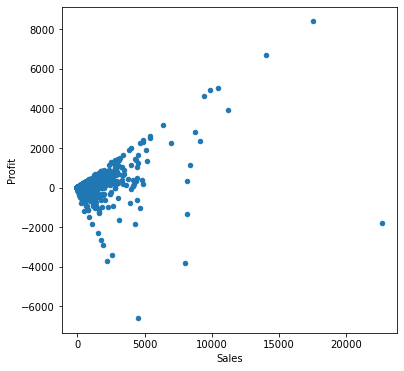

In [39]:
data.plot(kind='scatter', x='Sales', y='Profit', figsize=(6,6))

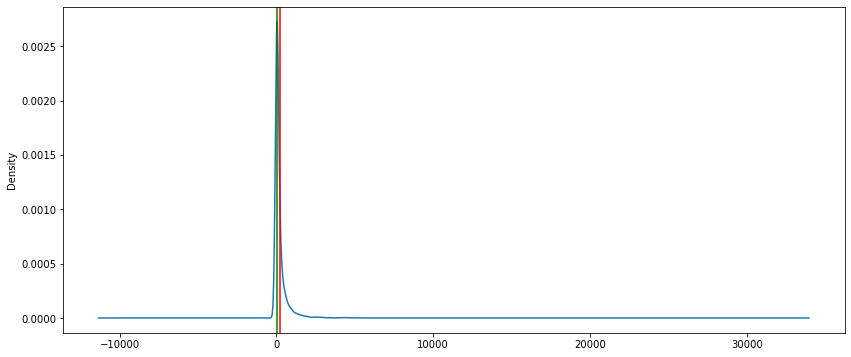

In [40]:
ax = data['Sales'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(data['Sales'].mean(), color='red')
ax.axvline(data['Sales'].median(), color='green')


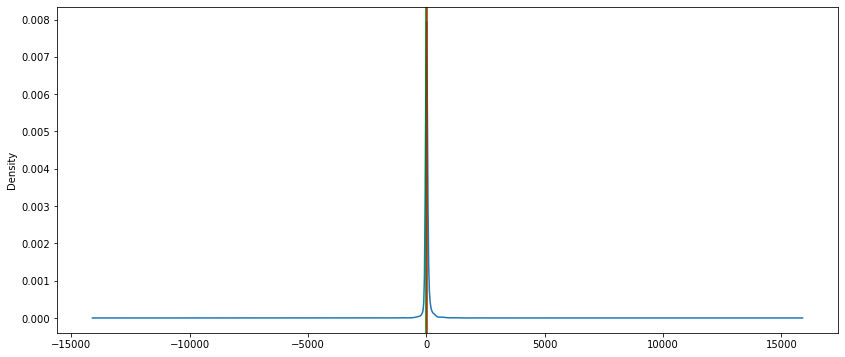

In [41]:
ax = data['Profit'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(data['Profit'].mean(), color='red')
ax.axvline(data['Profit'].median(), color='green')

Quantity       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Sales       AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Profit      AxesSubplot(0.672059,0.536818;0.227941x0.343182)
dtype: object

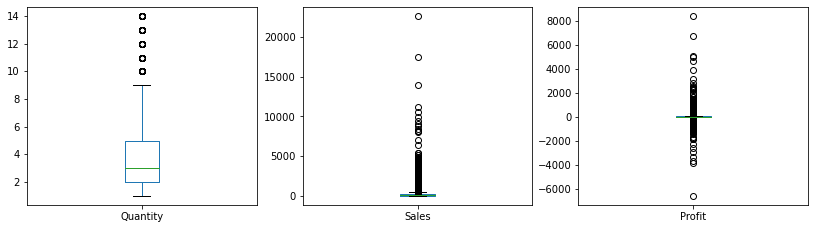

In [42]:
boxplot_cols = ['Quantity', 'Sales','Profit']

data[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

In [43]:
#sales.sort_values(['Revenue'], ascending=False).head(1)

cond = data['Sales'] == data['Sales'].max()

data.loc[cond]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2697,2698,CA-2014-145317,2014-03-18,23-03-14,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,32216,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784
